# Importing Data

In [48]:
# Importing Libraries

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [49]:
# defining path

path = r'/Users/robson/Desktop/CareerFoundry/Data Immersion/Achivement 4/19-04-2024 Instacart Basket Analysis'

In [50]:
#import dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'prepared_data', 'ords_prods_customer_merge.pkl'))

In [51]:
# import departments dataframe

df_department = pd.read_csv(os.path.join(path,'02 Data','prepared_data','departments_wrangled.csv'), index_col = False)

# Security Implications

In [52]:
# find any column which may have sensitive data 

df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_order', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'us_state',
       'age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       '_merge'],
      dtype='object')

###### According to the columns above, the first_name and surname columns configure a PII data, since it is possible to track back to a costumer. Also, gender, age and income can be also considered PII data. 


In [53]:
# first_name and surname columns configure PII as it allows to track back to the customer

# since these columns has no use in this analysis, I will drop it

df.drop(columns=['first_name','surname'], inplace= True)

In [54]:
# check if it was deleted 

df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_order', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', 'gender', 'us_state', 'age', 'date_joined',
       'n_dependants', 'marital_status', 'income', '_merge'],
      dtype='object')

#### 

# Customer Behavior by Geographic Area

In [55]:
# check the format which each state is in the column (full name or abbreviation)

df['us_state'].value_counts()

us_state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852

## If Statement with Loc function

In [56]:
# Create a loc statement to define the  Northeast region

df.loc[df['us_state'].isin(['Connecticut','Maine','Massachusetts','New Hampshire','New Jersey','New York','Pennsylvania','Rhode Island','Vermont']), 'region'] = 'Northeast'

In [57]:
# Create a loc statement to define the  Midwest region

df.loc[df['us_state'].isin(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']), 'region'] = 'Midwest'

In [58]:
# Create a loc statement to define the  South region

df.loc[df['us_state'].isin(['Alabama', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']), 'region'] = 'South'

In [59]:
# Create a loc statement to define the  West region

df.loc[df['us_state'].isin(['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']), 'region'] = 'West'

In [60]:
# check if the values match

df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [61]:
# check if the values match

df['us_state'].describe

<bound method NDFrame.describe of 0             Alabama
1             Alabama
2             Alabama
3             Alabama
4             Alabama
              ...    
32404854       Hawaii
32404855    Tennessee
32404856    Tennessee
32404857    Tennessee
32404858    Tennessee
Name: us_state, Length: 32404859, dtype: object>

In [62]:
# check if the values match

df['region'].describe

<bound method NDFrame.describe of 0           South
1           South
2           South
3           South
4           South
            ...  
32404854     West
32404855    South
32404856    South
32404857    South
32404858    South
Name: region, Length: 32404859, dtype: object>

###### I will use the if statement with loc in this case to save RAM, but I add below an if statement with user defined functions

## If Statement

In [63]:
# create a function that return the region a state belong to in the US - I am going to use the loc function to save some RAM

#def region_us(row):
  
  #if row['us_state'] in ['Connecticut','Maine','Massachusetts','New Hampshire','New Jersey','New York','Pennsylvania','Rhode Island','Vermont']:
    #return 'Northeast'
  #elif row['us_state'] in ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']:
    #return 'Midwest'
  #elif row['us_state'] in ['Alabama', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']:
    #return 'South'
  #elif row['us_state'] in ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']:
    #return 'West'
  #else: return np.nan

In [64]:
# apply the function above and create a column 'region'

#df['region'] = df.apply(region_us, axis=1)

In [65]:
# check if the values match

#df['region'].value_counts(dropna = False)

In [66]:
# check if the values match

#df['us_state'].info()

In [67]:
# check if the values match

#df['region'].info()

# Spending Habits by State

In [68]:
# Defining Crosstab for spending flag by region

df_spending_habits_region = pd.crosstab(df['region'], df['spending_flag'], dropna = False).sort_values(by = 'High Spender', ascending = False)

In [69]:
# Check if crosstab was sucessfuly created

df_spending_habits_region

spending_flag,High Spender,Low Spender
region,,
South,40579,10751306
West,31242,8261671
Midwest,29265,7568060
Northeast,18642,5704094


Text(0, 0.5, 'Frequency')

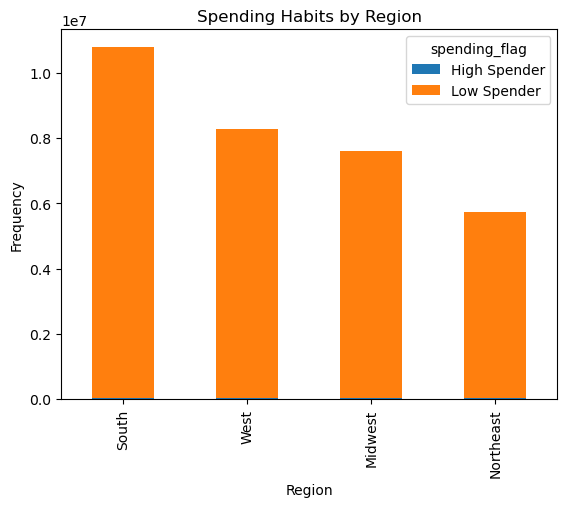

In [70]:
# create a stacked bar chart by Region

bar_spending_habits_region = df_spending_habits_region.plot.bar( stacked = True)

plt.title('Spending Habits by Region')
plt.xlabel('Region')
plt.ylabel('Frequency')

In [71]:
# save figure

bar_spending_habits_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'bar_spending_habits_region.png'))

###### The region that present the highest number of High Spender and Low Spender, follow the same order, which is: South, West, Midwest and Northeast. This shows that both regions, South and West, have the highest representativity in the instacart business and, maybe, ads for the Northeast and Midwest region could increase their share in the future. 


# Exclusion Flag - Low Activity Customers

In [72]:
# create an exclusion flag based on customer's activity - Low Activity Customers

df.loc[(df['max_order'] < 5), 'exclusion_flag'] = 'Low Activity Customer'

In [73]:
# create an exclusion flag based on customer's activity - Active Customers

df.loc[(df['max_order'] >= 5), 'exclusion_flag'] = 'Active Customer'

In [74]:
# Number of Low Activity Customer 

df['exclusion_flag'].value_counts()

exclusion_flag
Active Customer          30964564
Low Activity Customer     1440295
Name: count, dtype: int64

In [75]:
# Drop all the Low Activity Customers

filtered_df = df[df['exclusion_flag'] == 'Active Customer']


In [76]:
# Check if the filtering it was successful 

filtered_df['max_order'].describe()

count    3.096456e+07
mean     3.442569e+01
std      2.489504e+01
min      5.000000e+00
25%      1.400000e+01
50%      2.800000e+01
75%      4.800000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [77]:
# Export filtered dataframe 

filtered_df.to_pickle(os.path.join(path, '02 Data','prepared_data','active_customers_df.pkl'))

# Customer Profiling

## Customer Profiling - By Age

In [78]:
# Check the information regarding income of all clients

df['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [79]:
# create a customer profiling for young adult 

df.loc[(df['age'] >= 18) & (df['age'] <= 39), 'age_classification'] = 'Young Adult'

In [80]:
# create a customer profiling for adult 

df.loc[(df['age'] >= 40) & (df['age'] <= 59), 'age_classification'] = 'Middle Age Adult'

In [81]:
# create a customer profiling for middle age 

df.loc[(df['age'] >= 60), 'age_classification'] = 'Senior'

In [82]:
# check if the column englobe all the clients

df['age_classification'].value_counts(dropna = False)

age_classification
Young Adult         11164192
Senior              11067255
Middle Age Adult    10173412
Name: count, dtype: int64

## Customer Profiling - By Income

In [83]:
# Check the information regarding income of all clients

df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [84]:
# create a customer profiling for young low income

df.loc[(df['income'] >= 25903) & (df['income'] < 67004), 'income_classification'] = 'Low Income'

In [85]:
# create a customer profiling for young middle income

df.loc[(df['income'] >= 67004) & (df['income'] < 96618), 'income_classification'] = 'Middle Income'

In [86]:
# create a customer profiling for young upper-middle income

df.loc[(df['income'] >= 96618) & (df['income'] < 127912), 'income_classification'] = 'Upper Middle Income'

In [87]:
# create a customer profiling for young age upper income

df.loc[(df['income'] >= 127912), 'income_classification'] = 'High Income'

In [88]:
# check if the column englobe all the clients

df['income_classification'].value_counts(dropna = False)

income_classification
High Income            8101288
Low Income             8101214
Middle Income          8101207
Upper Middle Income    8101150
Name: count, dtype: int64

In [89]:
# check if the column englobe all the clients

df['income_classification'].info

<bound method Series.info of 0           Low Income
1           Low Income
2           Low Income
3           Low Income
4           Low Income
               ...    
32404854    Low Income
32404855    Low Income
32404856    Low Income
32404857    Low Income
32404858    Low Income
Name: income_classification, Length: 32404859, dtype: object>

## Customer Profiling - By Age and Income

In [90]:
# create a customer profiling for young low income

df.loc[(df['age'] >= 18) & (df['age']<=39) & (df['income'] >= 25903) & (df['income'] < 67004), 'customer_profiling'] = 'Young Adult - Low Income'

In [91]:
# create a customer profiling for young middle income

df.loc[(df['age'] >= 18) & (df['age']<=39) & (df['income'] >= 67004) & (df['income'] < 96618), 'customer_profiling'] = 'Young Adult - Middle Income'

In [92]:
# create a customer profiling for young upper-middle income

df.loc[(df['age'] >= 18) & (df['age']<=39) & (df['income'] >= 96618) & (df['income'] < 127912), 'customer_profiling'] = 'Young Adult - Upper Middle Income'

In [93]:
# create a customer profiling for young age upper income

df.loc[(df['age'] >= 18) & (df['age']<=39)& (df['income'] >= 127912), 'customer_profiling'] = 'Young Adult - High Income'

In [94]:
# create a customer profiling for middle age low income

df.loc[(df['age'] >= 40) & (df['age']<= 59) & (df['income'] >= 25903) & (df['income'] < 67004), 'customer_profiling'] = 'Middle Age Adult - Low Income'

In [95]:
# create a customer profiling for middle age middle income

df.loc[(df['age'] >= 40) & (df['age']<= 59) & (df['income'] >= 67004) & (df['income'] < 96618), 'customer_profiling'] = 'Middle Age Adult - Middle Income'

In [96]:
# create a customer profiling for middle age upper-middle income

df.loc[(df['age'] >= 40) & (df['age']<= 59) & (df['income'] >= 96618) & (df['income'] < 127912), 'customer_profiling'] = 'Middle Age Adult - Upper Middle Income'

In [97]:
# create a customer profiling for middle age upper income

df.loc[(df['age'] >= 40) & (df['age']<= 59) & (df['income'] >= 127912), 'customer_profiling'] = 'Middle Age Adult - High Income'

In [98]:
# create a customer profiling for senior age low income

df.loc[(df['age'] >= 60) & (df['income'] >= 25903) & (df['income'] < 67004), 'customer_profiling'] = 'Senior - Low Income'

In [99]:
# create a customer profiling for senior age middle income

df.loc[(df['age'] >= 60) & (df['income'] >= 67004) & (df['income'] < 96618), 'customer_profiling'] = 'Senior - Middle Income'

In [100]:
# create a customer profiling for senior age upper-middle income

df.loc[(df['age'] >= 60) & (df['income'] >= 96618) & (df['income'] < 127912), 'customer_profiling'] = 'Senior - Upper Middle Income'

In [101]:
# create a customer profiling for senior age upper income

df.loc[(df['age'] >= 60) & (df['income'] >= 127912), 'customer_profiling'] = 'Senior - High Income'

In [102]:
# check frequency

df['customer_profiling'].value_counts()

customer_profiling
Young Adult - Middle Income               5144420
Young Adult - Low Income                  5139771
Senior - High Income                      4254283
Senior - Upper Middle Income              3887289
Middle Age Adult - High Income            3720813
Middle Age Adult - Upper Middle Income    3460052
Middle Age Adult - Low Income             1515664
Senior - Middle Income                    1479904
Middle Age Adult - Middle Income          1476883
Senior - Low Income                       1445779
Young Adult - Upper Middle Income          753809
Young Adult - High Income                  126192
Name: count, dtype: int64

## Customer Profile and Number of Dependants

In [103]:
# Number of Dependants by Income

df_ic_nd = pd.crosstab(df['income_classification'], df['n_dependants'], dropna = False)

In [104]:
# Check the crosstab created

df_ic_nd

n_dependants,0,1,2,3
income_classification,,,,
High Income,2033354,2006338,2023123,2038473
Low Income,2021857,2020558,2023416,2035383
Middle Income,2006892,2036384,2027556,2030375
Upper Middle Income,2035400,2017824,2017048,2030878


In [105]:
# Number of Dependants by Age

df_ac_nd = pd.crosstab(df['age_classification'], df['n_dependants'], dropna = False)

In [106]:
# Check the crosstab created

df_ac_nd

n_dependants,0,1,2,3
age_classification,,,,
Middle Age Adult,2543861,2589598,2489108,2550845
Senior,2771812,2706509,2806545,2782389
Young Adult,2781830,2784997,2795490,2801875


## Customer Profile and Marital Status

In [107]:
# Marital Status or Family by Customer Profiling

df_cp_family = pd.crosstab(df['income_classification'], df['marital_status'], dropna = False)

In [108]:
# Family Status by Income

df_cp_family

marital_status,divorced/widowed,living with parents and siblings,married,single
income_classification,,,,
High Income,1059117,17948,6049986,974237
Low Income,352814,693454,5385903,1669043
Middle Income,373721,736798,5357517,1633171
Upper Middle Income,986160,102403,5963347,1049240


In [109]:
# Family Status

df['marital_status'].value_counts()

marital_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

## Economic Status and Expenditure

In [110]:
# Most commom day of week by Customer Income

df_ci_number_orders = pd.crosstab(df['income_classification'], df['order_day_of_week'], dropna = False)

In [111]:
# Check the crosstab created

df_ci_number_orders

order_day_of_week,0,1,2,3,4,5,6
income_classification,,,,,,,
High Income,1586254,1387018,1039659,955936,941715,1037259,1153447
Low Income,1420044,1498714,1095829,989054,975235,1087107,1035231
Middle Income,1613300,1388614,1041099,948410,934126,1031092,1144566
Upper Middle Income,1584584,1385884,1037243,947134,932726,1050333,1163246


In [112]:
# Most commom day of week by Customer Age

df_ca_number_orders = pd.crosstab(df['age_classification'], df['order_day_of_week'], dropna = False)

In [113]:
# Check the crosstab created

df_ca_number_orders

order_day_of_week,0,1,2,3,4,5,6
age_classification,,,,,,,
Middle Age Adult,1943218,1773683,1332599,1202056,1185068,1315573,1421215
Senior,2115618,1919392,1438785,1319705,1290424,1440912,1542419
Young Adult,2145346,1967155,1442446,1318773,1308310,1449306,1532856


## Expenditure by Family Status

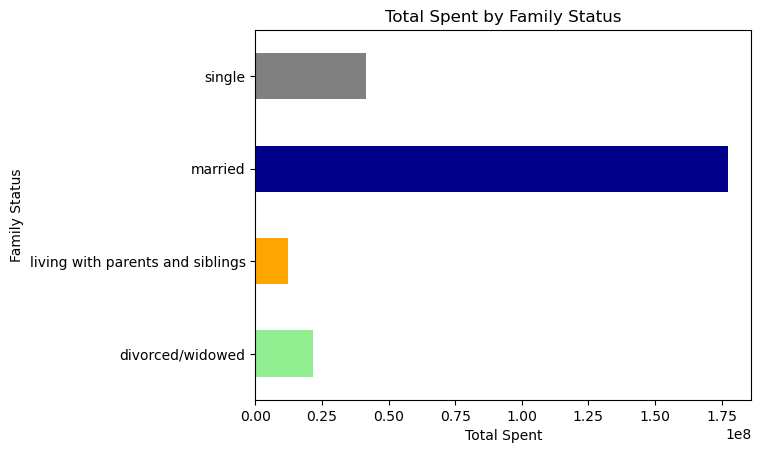

In [114]:
# Create a bar chart showing the total spent by family status 

sum_spent_family = df.groupby('marital_status')['prices'].sum()

bar_family_spent = sum_spent_family.plot.barh(color = ['LightGreen','Orange','DarkBlue','Grey'])

plt.title('Total Spent by Family Status')
plt.xlabel('Total Spent')
plt.ylabel('Family Status')

bar_family_spent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'bar_sum_family_spent.png'))


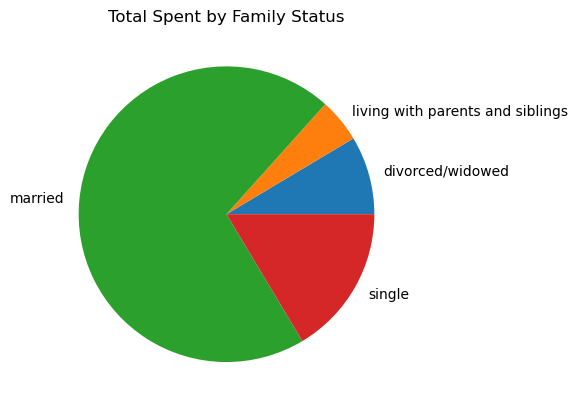

In [115]:
# Create a pie chart showing the total spent by family status 

pie_family_spent = sum_spent_family.plot.pie()

plt.title('Total Spent by Family Status')
plt.xlabel('')
plt.ylabel('')

pie_family_spent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'pie_sum_family_spent.png'))


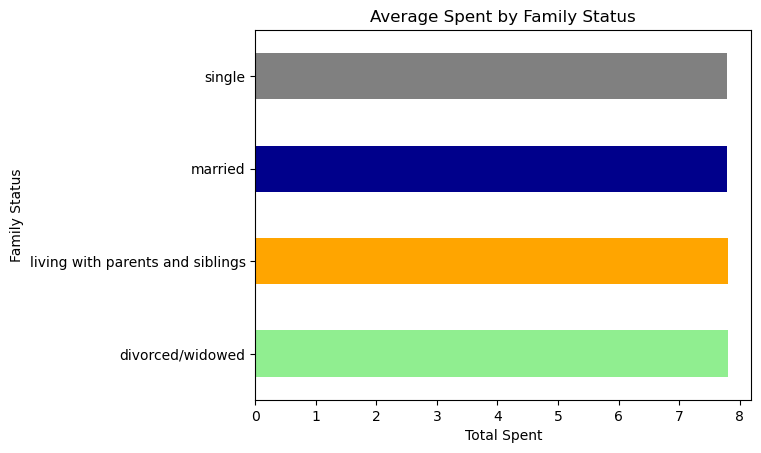

In [116]:
# Create a bar chart showing the avg spent by family status 

avg_spent_family = df.groupby('marital_status')['prices'].mean()

bar_avg_family_spent = avg_spent_family.plot.barh(color = ['LightGreen','Orange','DarkBlue','Grey'])

plt.title('Average Spent by Family Status')
plt.xlabel('Total Spent')
plt.ylabel('Family Status')

bar_avg_family_spent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'bar_avg_family_spent.png'))

## Expenditure by Age

In [130]:
# Create a crosstab showing the total spent by age

df_spent_age = df.groupby(['age']).agg({'prices': ['mean','min','max','sum']})

df_spent_age.to_clipboard()

In [119]:
df_spent_age

prices                      
         mean  min   max        sum
age                                
18   7.806997  1.0  25.0  3906621.1
19   7.805773  1.0  25.0  4055505.2
20   7.773200  1.0  25.0  3908325.9
21   7.782382  1.0  25.0  3987871.7
22   7.784471  1.0  25.0  3999497.9
..        ...  ...   ...        ...
77   7.759185  1.0  25.0  3895188.5
78   7.807224  1.0  25.0  3866223.3
79   7.776699  1.0  25.0  4119247.6
80   7.802058  1.0  25.0  4019347.1
81   7.802747  1.0  25.0  3973369.3

[64 rows x 4 columns]

In [131]:
df_spent_age.columns = ['_'.join(col).strip() for col in df_spent_age.columns.values]

In [133]:
df_spent_age = df_spent_age.reset_index()

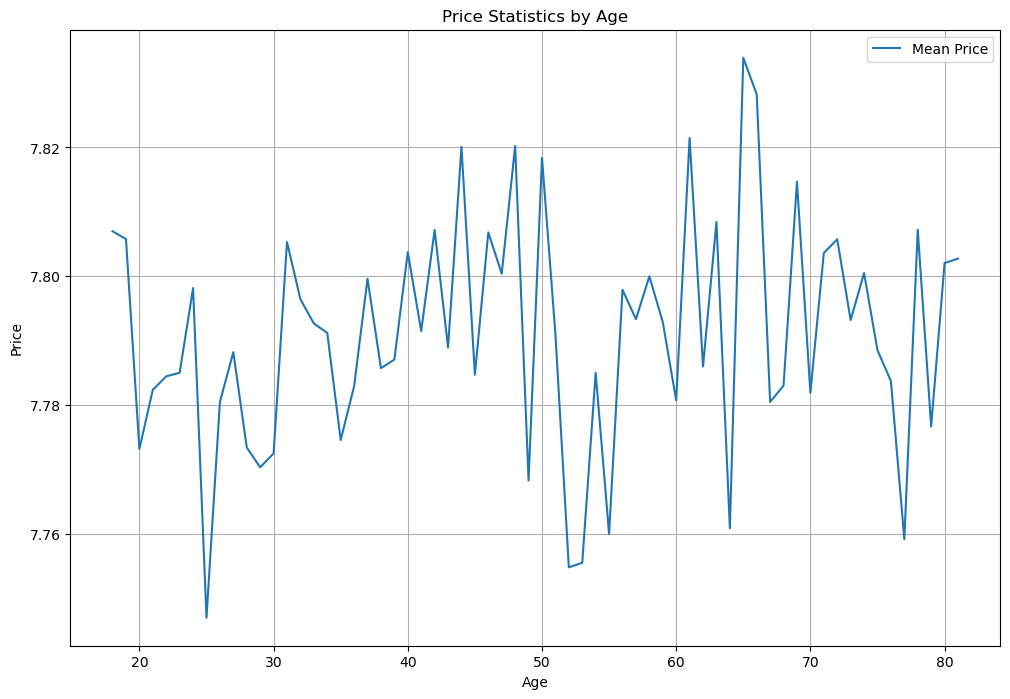

In [137]:
plt.figure(figsize=(12, 8))

plt.plot(df_spent_age['age'], df_spent_age['prices_mean'], label='Mean Price')

plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price Statistics by Age')
plt.legend()
plt.grid(True)
plt.show()

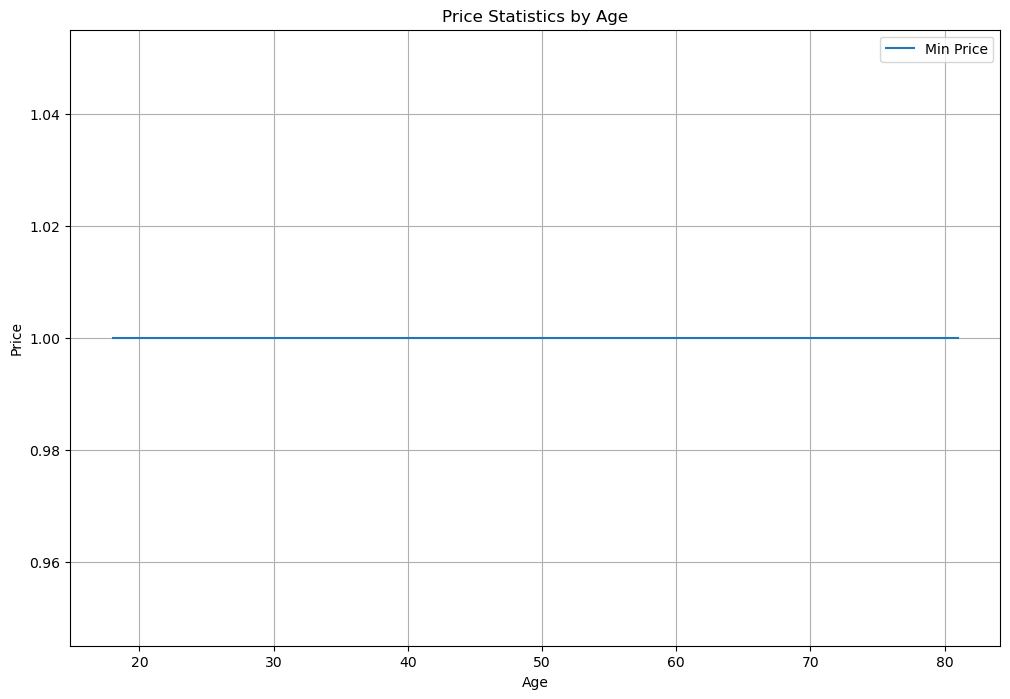

In [138]:
plt.figure(figsize=(12, 8))

plt.plot(df_spent_age['age'], df_spent_age['prices_min'], label='Min Price')

plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price Statistics by Age')
plt.legend()
plt.grid(True)
plt.show()

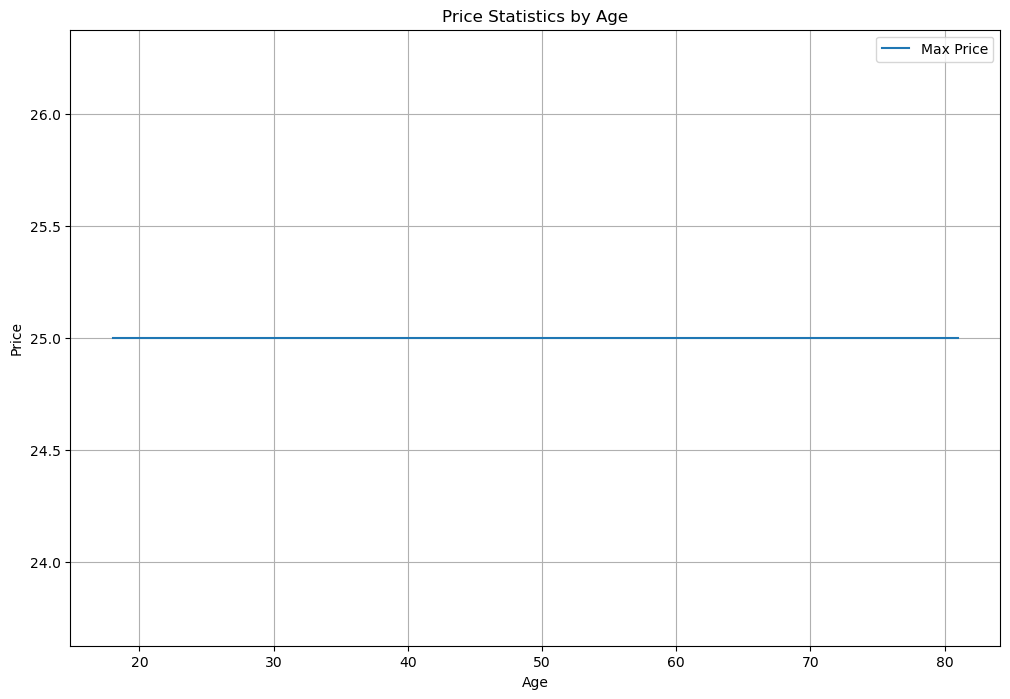

In [139]:
plt.figure(figsize=(12, 8))

plt.plot(df_spent_age['age'], df_spent_age['prices_max'], label='Max Price')

plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price Statistics by Age')
plt.legend()
plt.grid(True)
plt.show()

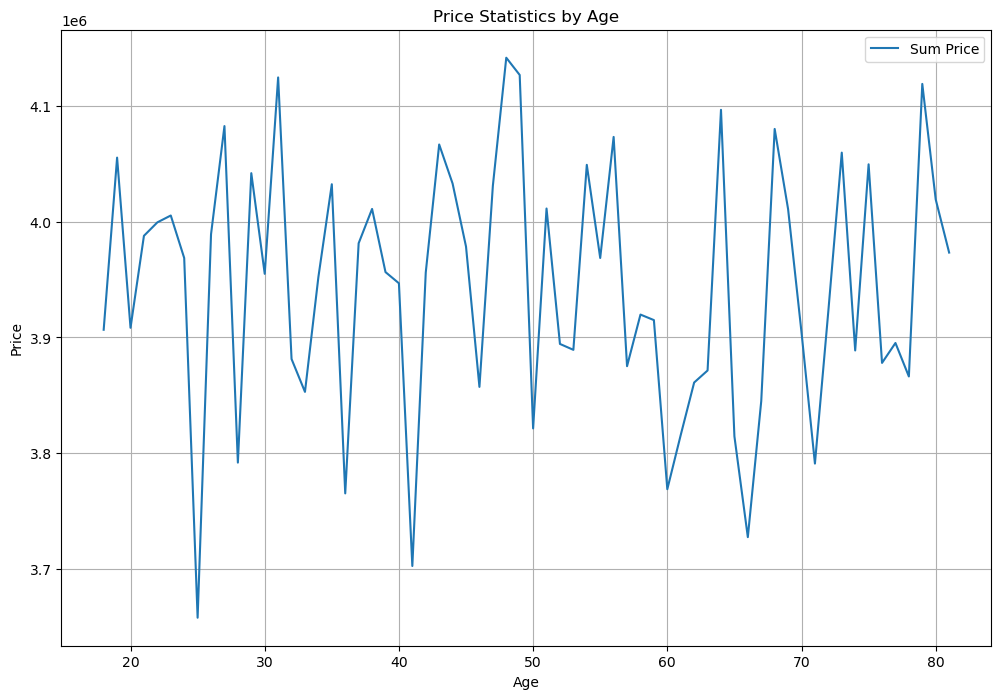

In [140]:
plt.figure(figsize=(12, 8))

plt.plot(df_spent_age['age'], df_spent_age['prices_sum'], label='Sum Price')

plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price Statistics by Age')
plt.legend()
plt.grid(True)
plt.show()

## Loyalty Brand 



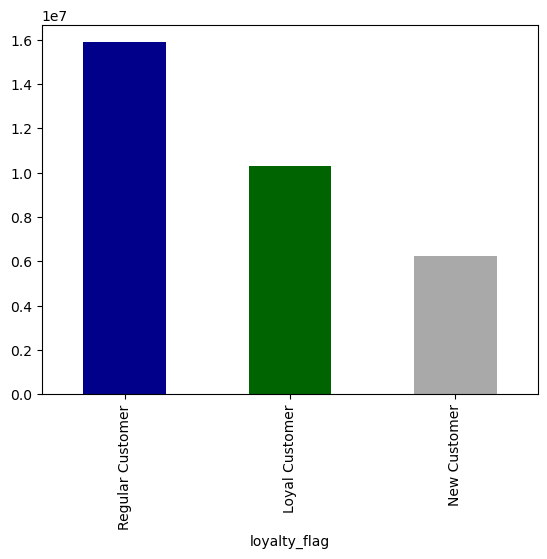

In [ ]:
# Bar Visualization - Loyalty Flag 

bar_loyalty_brand = df['loyalty_flag'].value_counts().plot.bar(color = ['DarkBlue','DarkGreen','DarkGrey'])

In [ ]:
# Save Figure

bar_loyalty_brand.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'bar_loyalty_brand.png'))

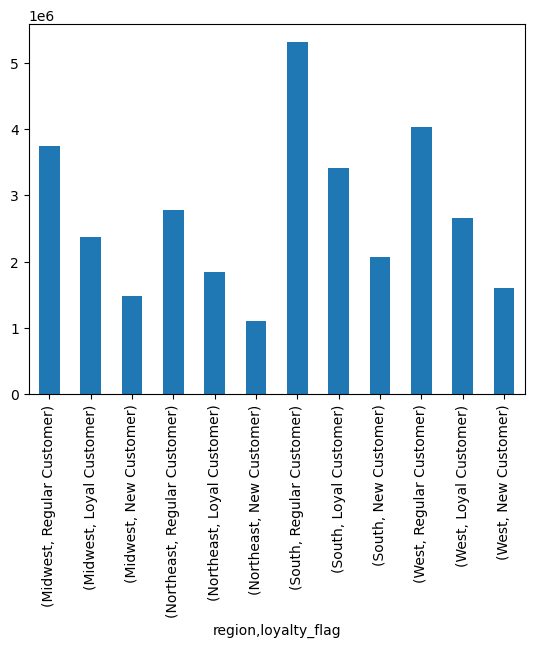

In [ ]:
# Bar Visualization - Loyalty Flag by Region

bar_loyalty_region = df.groupby('region')['loyalty_flag'].value_counts().plot.bar()

In [ ]:
# Save figure

bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'bar_loyalty_region.png'))

In [ ]:
# spending habits by brand loyalty

spending_habits_brand = df.groupby('loyalty_flag').agg({'prices': ['mean','min','max','sum']})

In [ ]:
# copy to clipboard 

spending_habits_brand.to_clipboard()

In [ ]:
spending_habits_brand

prices                        
                      mean  min   max          sum
loyalty_flag                                      
Loyal Customer    7.773575  1.0  25.0   79933825.2
New Customer      7.801206  1.0  25.0   48701689.2
Regular Customer  7.798262  1.0  25.0  123790606.2

# Distribution of Profiles - Visualization

Text(0, 0.5, 'Age Classification')

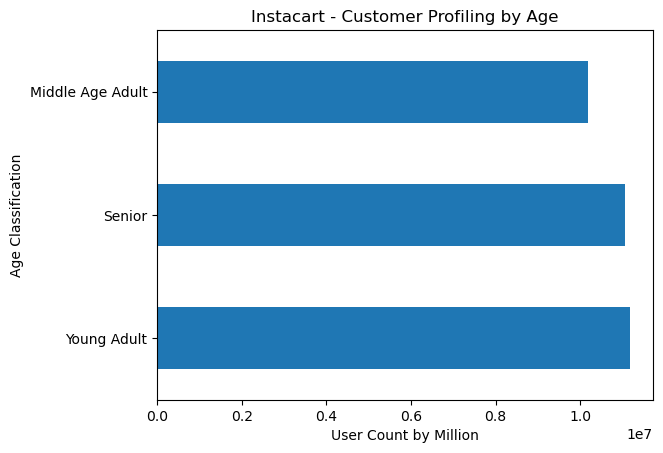

In [ ]:
# create an horizontal bar to show the proportion of clients according to the Customer Profiling created.

barh_profile_by_age = df['age_classification'].value_counts().plot.barh()

plt.title('Instacart - Customer Profiling by Age')
plt.xlabel('User Count by Million')
plt.ylabel('Age Classification')

In [ ]:
# Save Figure

barh_profile_by_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'barh_profile_user_age.png'))

# Customer-Profile by Usage Frequency and Expenditure

### Customer Profile by Expenditure

In [ ]:
# create a dataframe with the expenditure by customer profile

expenditure_cp = df.groupby('customer_profiling').agg({'prices':['max','mean','min']})

In [ ]:
# check if it was created accordingly 

expenditure_cp

prices               
                                          max      mean  min
customer_profiling                                          
Middle Age Adult - High Income           25.0  7.959906  1.0
Middle Age Adult - Low Income            25.0  6.817741  1.0
Middle Age Adult - Middle Income         25.0  7.950467  1.0
Middle Age Adult - Upper Middle Income   25.0  7.970727  1.0
Senior - High Income                     25.0  7.959136  1.0
Senior - Low Income                      25.0  6.694798  1.0
Senior - Middle Income                   25.0  7.958896  1.0
Senior - Upper Middle Income             25.0  7.963127  1.0
Young Adult - High Income                25.0  7.805624  1.0
Young Adult - Low Income                 25.0  7.587542  1.0
Young Adult - Middle Income              25.0  7.959071  1.0
Young Adult - Upper Middle Income        25.0  7.951528  1.0

## Customer Profile by Frequency

In [ ]:
# create a dataframe with the frequency by customer profile

frequency_cp = df.groupby('customer_profiling').agg({'days_since_prior_order': ['mean','min','max']})

In [ ]:
# check if it was created accordingly 

frequency_cp

days_since_prior_order           
                                                         mean  min   max
customer_profiling                                                      
Middle Age Adult - High Income                      11.097548  0.0  30.0
Middle Age Adult - Low Income                       11.474728  0.0  30.0
Middle Age Adult - Middle Income                    11.025145  0.0  30.0
Middle Age Adult - Upper Middle Income              11.007920  0.0  30.0
Senior - High Income                                10.976317  0.0  30.0
Senior - Low Income                                 11.591552  0.0  30.0
Senior - Middle Income                              10.955673  0.0  30.0
Senior - Upper Middle Income                        11.088397  0.0  30.0
Young Adult - High Income                           10.395068  0.0  30.0
Young Adult - Low Income                            11.202763  0.0  30.0
Young Adult - Middle Income                         11.001945  0.0  30.0
Young Adult - Upper Middle Income                   11.310353  0.0  30.0

# Customer - By Profile and Region

In [ ]:
# Compare Customer Profile by Region 

region_cp = pd.crosstab(df['customer_profiling'], df['region'],dropna = False)

region_cp

region,Midwest,Northeast,South,West
customer_profiling,,,,
Middle Age Adult - High Income,902906,649352,1206220,962335
Middle Age Adult - Low Income,353606,263968,498406,399684
Middle Age Adult - Middle Income,334641,256102,513941,372199
Middle Age Adult - Upper Middle Income,835505,620857,1111992,891698
Senior - High Income,996451,769246,1413060,1075526
Senior - Low Income,329781,261311,485446,369241
Senior - Middle Income,326278,254799,506258,392569
Senior - Upper Middle Income,917028,687747,1280819,1001695
Young Adult - High Income,28686,22258,46975,28273


In [ ]:
region_cp.to_clipboard()

In [ ]:
# Filter Total of High Spender by Region  

high_spenders = df[df['spending_flag'] == 'High Spender'].groupby('region').size()

In [ ]:
# Filter Total of Low Spender by Region  

low_spenders =  df[df['spending_flag'] == 'Low Spender'].groupby('region').size()


In [ ]:
# Check frequency High Spender by Region

high_spenders

region
Midwest      29265
Northeast    18642
South        40579
West         31242
dtype: int64

Text(0, 0.5, 'Customer Count')

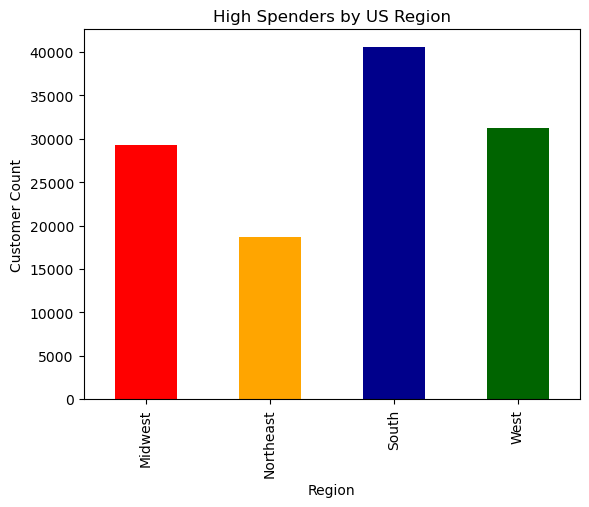

In [ ]:
# Visualization - High Spender by Region Habits 

bar_high_spenders = high_spenders.plot.bar(color = ['Red','Orange','DarkBlue','DarkGreen'])
plt.title('High Spenders by US Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')

In [ ]:
# Save figure

bar_high_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'bar_high_spenders_region.png'))

In [ ]:
# Check frequency Low Spender by Region

low_spenders

region
Midwest       7568060
Northeast     5704094
South        10751306
West          8261671
dtype: int64

Text(0, 0.5, 'Customer Count by 10 Million')

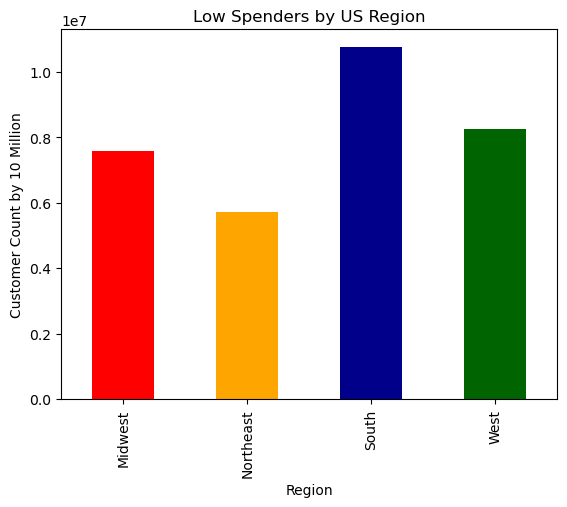

In [ ]:
# Visualization - Low Spender by Region

bar_low_spenders = low_spenders.plot.bar(color = ['Red','Orange','DarkBlue','DarkGreen'])
plt.title('Low Spenders by US Region')
plt.xlabel('Region')
plt.ylabel('Customer Count by 10 Million')


In [ ]:
# Save figure

bar_low_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'bar_low_spenders_region.png'))

In [ ]:
# region prior order 

region_prior_order = df.groupby(['region']).agg({'days_since_prior_order': ['mean','min','max']})

In [ ]:
# copy to clipboard

region_prior_order.to_clipboard()

In [ ]:
# region expenditure

region_price_total = df.groupby(['region']).agg({'prices': ['mean','min','max','sum']})

region_price_total.to_clipboard()

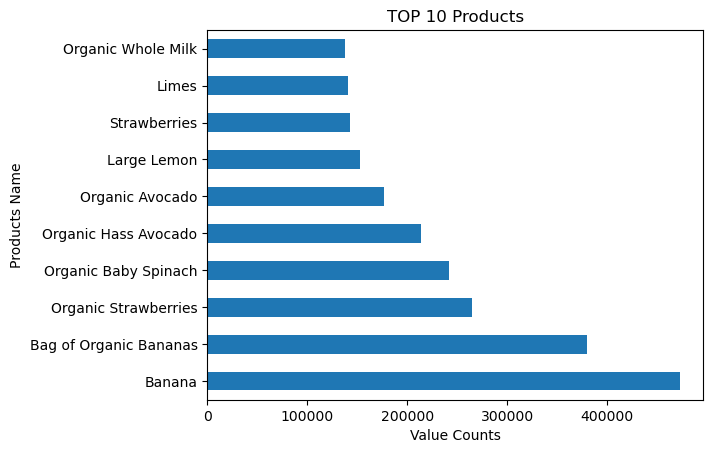

In [ ]:
# Bar Visualization - Top 10 Most sold product - All Regions

barh_top10_products = df['product_name'].value_counts().head(10).plot.barh()
plt.title('TOP 10 Products')
plt.xlabel('Value Counts')
plt.ylabel('Products Name')


barh_top10_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'bar_top10_products.png'))

###### Overview: After comparing the customer profiling with each region and departments, it is possible to set the following link betweem them: 

###### All regions showed the same result regarding the top 10 departments, which were identical, following the exact same order, as can be confirmed below. The only region that presented a difference it was the Northeast, which presented a higher consume of 'deli' instead of 'canned goods', changing the position between the 8 and 9 spot. 

###### Another link is regarding the top 10 products consumed, which were, in general, similar, with minor changes depending on the region.

###### The last link that I was able to notice was the proportion of High and Low spenders. According to the visualization, which can be found in the next question, the region that present the highest number of High Spender and Low Spender, follow the same order, which is: South, West, Midwest and Northeast. This shows that both regions, South and West, have the highest representativity in the instacart business and, maybe, ads for the Northeast and Midwest region could increase their share in the future. 

###### It is important to consider that each region has a huge difference in data, so, even though the information mentioned were similar, there is a great difference between the frequency of each one of them.

In [ ]:
# TOP 10 Departments - All Regions

df['department_id'].value_counts(dropna= False).head(10)

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
Name: count, dtype: int64

In [ ]:
# Define data dictionary

df_department.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

df_department.set_index('department_id', inplace= True)
data_dict = df_department.to_dict('index') 

In [ ]:
# Transform the department_id into their name 

print ('id 4 -',data_dict.get(4)),
print ('id 16 -',data_dict.get(16)),
print ('id 19 -',data_dict.get(19)),
print ('id 7 -',data_dict.get(7)),
print ('id 1 -',data_dict.get(1)),
print ('id 13 -',data_dict.get(13)),
print ('id 3 -',data_dict.get(3)),
print ('id 20 -',data_dict.get(20)),
print ('id 15 -',data_dict.get(15)),
print ('id 9 -',data_dict.get(9))

id 4 - {'department': 'produce'}
id 16 - {'department': 'dairy eggs'}
id 19 - {'department': 'snacks'}
id 7 - {'department': 'beverages'}
id 1 - {'department': 'frozen'}
id 13 - {'department': 'pantry'}
id 3 - {'department': 'bakery'}
id 20 - {'department': 'deli'}
id 15 - {'department': 'canned goods'}
id 9 - {'department': 'dry goods pasta'}


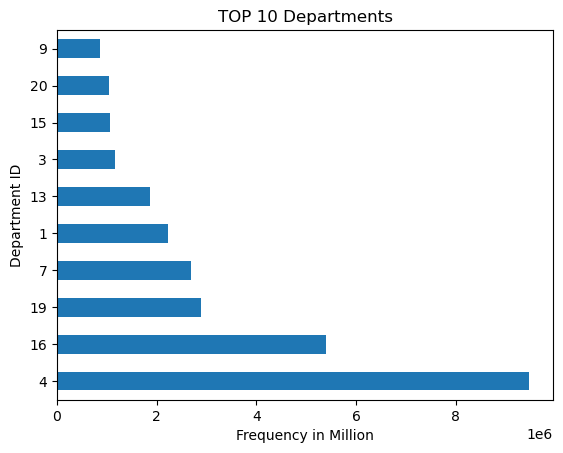

In [ ]:
barh_top10_department = df['department_id'].value_counts().head(10).plot.barh()

plt.title('TOP 10 Departments')
plt.xlabel('Frequency in Million')
plt.ylabel('Department ID')
barh_top10_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10', 'bar_top10_department.png'))

# Export Data

In [ ]:
df.to_pickle(os.path.join(path, '02 Data', 'prepared_data', 'final_order_prods_customer.pkl'))